# Studi Kasus Bab 5

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow import keras
from tensorflow.random import set_seed
from tensorflow.keras.layers import Input,Dense,concatenate,Dropout
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import MeanAbsoluteError,MeanSquaredError,Accuracy,Precision,Recall,CategoricalCrossentropy

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2021-09-17 04:39:27.044213: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-17 04:39:27.044360: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
boston=pd.read_csv('../input/the-boston-houseprice-data/boston.csv')
fullcov=pd.read_csv('../input/full-coverage/FullCoverage.csv')
customer_train=pd.read_csv('../input/customer-segmentation/Customer_Train.csv')
customer_test=pd.read_csv('../input/customer-segmentation/Customer_Test.csv')

In [3]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
customer_train.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,0,0,22,0,1.0,0,4.0,4,3,0,0,0,0,0,1,0,0,0
1,1,1,38,1,1.0,1,3.0,4,0,0,0,1,0,0,0,0,0,0
2,1,1,67,1,1.0,0,1.0,6,1,0,0,1,0,0,0,0,0,0
3,0,1,67,1,0.0,2,2.0,6,1,0,0,0,0,0,0,0,1,0
4,1,1,40,1,1.0,2,6.0,6,0,0,0,0,1,0,0,0,0,0


In [5]:
fullcov.head()

,age,seniority,men,urban,private,marital,y
0,58,32,1,1,1,C,0
1,37,30,1,0,1,C,1
2,56,28,1,0,1,C,1
3,68,27,1,0,1,C,0
4,58,26,1,0,1,C,0


In [6]:
fullcov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4000 non-null   int64 
 1   seniority  4000 non-null   int64 
 2   men        4000 non-null   int64 
 3   urban      4000 non-null   int64 
 4   private    4000 non-null   int64 
 5   marital    4000 non-null   object
 6   y          4000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 218.9+ KB


In [7]:
fullcov_col=fullcov.select_dtypes('object')

for i in fullcov_col:
    print(fullcov[i].value_counts(), end="\n\n")

C    2973
S     861
O     166
Name: marital, dtype: int64



In [8]:
fullcov_dummy=pd.get_dummies(fullcov)

In [9]:
fullcov_dummy.head()

,age,seniority,men,urban,private,y,marital_C,marital_O,marital_S
0,58,32,1,1,1,0,1,0,0
1,37,30,1,0,1,1,1,0,0
2,56,28,1,0,1,1,1,0,0
3,68,27,1,0,1,0,1,0,0
4,58,26,1,0,1,0,1,0,0


In [10]:
X=boston.drop(['MEDV'],axis=1)
Y=boston['MEDV']

In [11]:
X_trainc=customer_train.drop(['Segmentation'],axis=1)
Y_trainc=customer_train['Segmentation']

In [12]:
X_testc=customer_test.drop(['Segmentation'],axis=1)
Y_testc=customer_test['Segmentation']

In [13]:
Xcov=fullcov_dummy.drop(['y'],axis=1)
Ycov=fullcov_dummy['y']

In [14]:
#Untuk Data Regresi
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [15]:
#Untuk Data Klasifikasi
X_trainf,X_testf,Y_trainf,Y_testf=train_test_split(Xcov,Ycov,test_size=0.3)

In [16]:
reg_scaler=StandardScaler()
X_train=reg_scaler.fit_transform(X_train)
X_test=reg_scaler.transform(X_test)

In [17]:
#Untuk Klasifikasi Multiclass
cls_scaler=StandardScaler()
X_trainc=cls_scaler.fit_transform(X_trainc)
X_testc=cls_scaler.transform(X_testc)

In [18]:
#Untuk Klasifikasi Biner
clsb_scaler=StandardScaler()
X_trainf=clsb_scaler.fit_transform(X_trainf)
X_testf=clsb_scaler.transform(X_testf)

In [19]:
np.random.seed(1234)
set_seed(1234)

## Regresi

In [20]:
#Model MLP Regresi
inputs=Input(shape=X_train.shape[1:])
layers=Dense(10,activation='relu')(inputs)
layers=Dense(10,activation='relu')(layers)
output=Dense(1)(layers)
model=Model(inputs=[inputs],outputs=[output])

model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=1e-3), 
              metrics=[MeanAbsoluteError(),MeanSquaredError()])

2021-09-17 04:39:34.817427: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-17 04:39:34.819629: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-09-17 04:39:34.819663: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-17 04:39:34.819688: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (0f2a1793c2cb): /proc/driver/nvidia/version does not exist
2021-09-17 04:39:34.821049: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


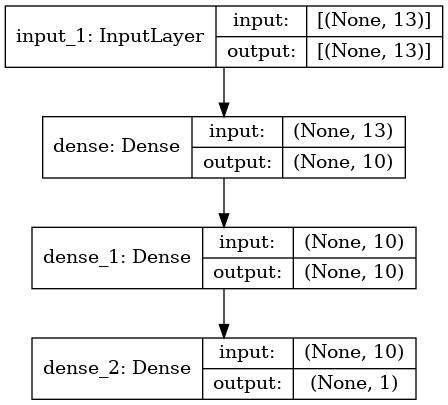

In [22]:
plot_model(model, "Model MLP Regresi.png", show_shapes=True)

In [23]:
history=model.fit(X_train,Y_train,epochs=100,validation_data=(X_test,Y_test))

2021-09-17 04:39:36.516248: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-17 04:39:36.529225: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/100
12/12 [==============================] - 1s 57ms/step - loss: 630.7959 - mean_absolute_error: 22.9513 - mean_squared_error: 630.7959 - val_loss: 521.3954 - val_mean_absolute_error: 21.0850 - val_mean_squared_error: 521.3954
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 603.3572 - mean_absolute_error: 22.5122 - mean_squared_error: 603.3572 - val_loss: 510.7291 - val_mean_absolute_error: 20.8362 - val_mean_squared_error: 510.7291
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 585.7633 - mean_absolute_error: 22.3090 - mean_squared_error: 585.7633 - val_loss: 499.5076 - val_mean_absolute_error: 20.5751 - val_mean_squared_error: 499.5076
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 550.5197 - mean_absolute_error: 21.6337 - mean_squared_error: 550.5197 - val_loss: 487.5206 - val_mean_absolute_error: 20.2936 - val_mean_squared_error: 487.5206
Epoch 5/100
12/12 [==============================] - 0s 7ms

<Figure size 432x288 with 0 Axes>

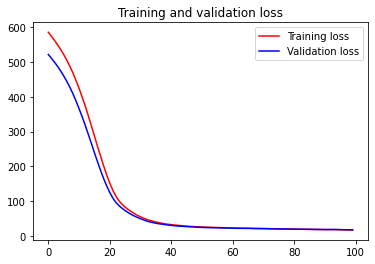

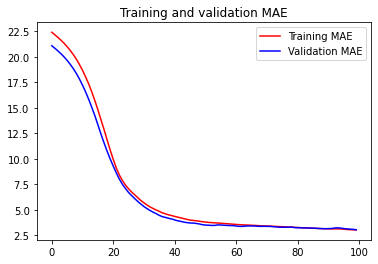

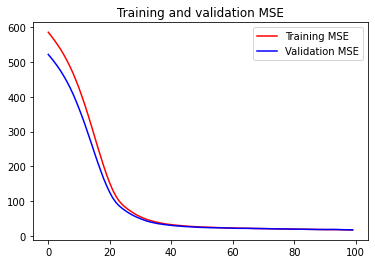

<Figure size 432x288 with 0 Axes>

In [24]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
mae=history.history['mean_absolute_error']
val_mae=history.history['val_mean_absolute_error']
mse=history.history['mean_squared_error']
val_mse=history.history['val_mean_squared_error']

epochs=range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, mae, 'r', label = 'Training MAE')
plt.plot(epochs, val_mae, 'b', label ='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()
plt.figure()

plt.plot(epochs, mse, 'r', label = 'Training MSE')
plt.plot(epochs, val_mse, 'b', label ='Validation MSE')
plt.title('Training and validation MSE')
plt.legend()
plt.figure()

In [25]:
test_eval=model.evaluate(X_test, Y_test)
for name, value in zip(model.metrics_names, test_eval):
  print(name, ': ', value)
print()

5/5 [==============================] - 0s 1ms/step - loss: 17.5898 - mean_absolute_error: 3.0508 - mean_squared_error: 17.5898
loss :  17.58979034423828
mean_absolute_error :  3.050837516784668
mean_squared_error :  17.58979034423828



In [26]:
Y_pred=model.predict(X_test)

In [27]:
#Simpan model
model.save("MLP Regresi.h5")

In [28]:
#Memuat (load) model 
model=load_model("MLP Regresi.h5")
Y_pred=model.predict(X_test)

## Klasifikasi Biner

In [29]:
#Model MLP Klasifikasi Biner
inputs=Input(shape=X_trainf.shape[1:])
layers=Dense(20,activation='relu')(inputs)
layers=Dense(10,activation='relu')(layers)
output=Dense(1,activation='sigmoid')(layers)
model2=Model(inputs=[inputs],outputs=[output])

model2.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=1e-3), 
              metrics=["accuracy",Precision(),Recall()])

In [30]:
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                180       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


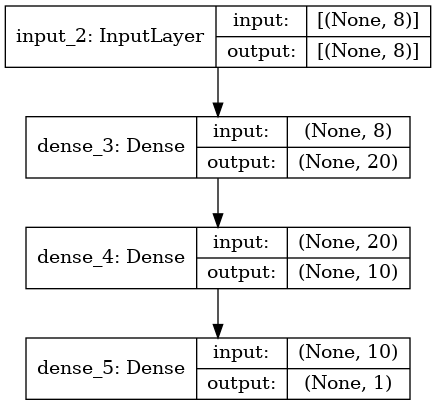

In [31]:
plot_model(model2, "Model MLP Klasifikasi Biner.png", show_shapes=True)

In [32]:
history2=model2.fit(X_trainf,Y_trainf,epochs=100,validation_data=(X_testf,Y_testf))

Epoch 1/100
88/88 [==============================] - 1s 7ms/step - loss: 0.6879 - accuracy: 0.5383 - precision: 0.3643 - recall: 0.3963 - val_loss: 0.5997 - val_accuracy: 0.6742 - val_precision: 0.5851 - val_recall: 0.2600
Epoch 2/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5774 - accuracy: 0.6776 - precision: 0.5530 - recall: 0.2454 - val_loss: 0.5670 - val_accuracy: 0.6692 - val_precision: 0.5546 - val_recall: 0.3121
Epoch 3/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.6954 - precision: 0.5811 - recall: 0.3235 - val_loss: 0.5522 - val_accuracy: 0.6883 - val_precision: 0.5793 - val_recall: 0.4232
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5273 - accuracy: 0.6962 - precision: 0.5716 - recall: 0.4317 - val_loss: 0.5435 - val_accuracy: 0.7050 - val_precision: 0.5940 - val_recall: 0.5154
Epoch 5/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5079 - accuracy: 0.7283 - precisi

<Figure size 432x288 with 0 Axes>

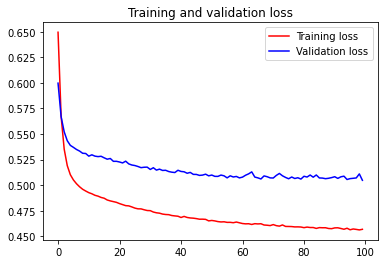

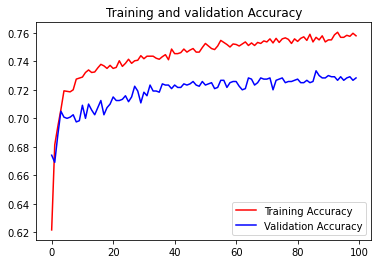

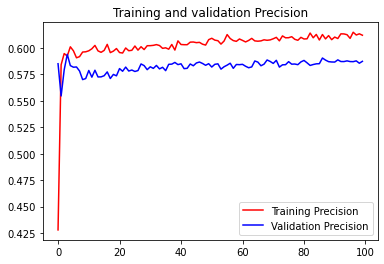

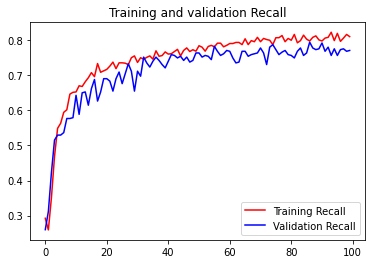

<Figure size 432x288 with 0 Axes>

In [33]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

loss=history2.history['loss']
val_loss=history2.history['val_loss']
acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']
prec=history2.history['precision']
val_prec=history2.history['val_precision']
rec=history2.history['recall']
val_rec=history2.history['val_recall']

epochs=range(len(acc))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label ='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, prec, 'r', label = 'Training Precision')
plt.plot(epochs, val_prec, 'b', label ='Validation Precision')
plt.title('Training and validation Precision')
plt.legend()
plt.figure()

plt.plot(epochs, rec, 'r', label = 'Training Recall')
plt.plot(epochs, val_rec, 'b', label ='Validation Recall')
plt.title('Training and validation Recall')
plt.legend()
plt.figure()

In [34]:
test2_eval=model2.evaluate(X_testf, Y_testf)
for name, value in zip(model2.metrics_names, test2_eval):
  print(name, ': ', value)
print()

38/38 [==============================] - 0s 1ms/step - loss: 0.5048 - accuracy: 0.7283 - precision: 0.5874 - recall: 0.7707
loss :  0.5048016905784607
accuracy :  0.7283333539962769
precision :  0.5873873829841614
recall :  0.7706855535507202



In [35]:
Y_predf=model2.predict(X_testf)

In [36]:
Y_predf

array([[0.60163224],
       [0.63277984],
       [0.10667378],
       ...,
       [0.5847155 ],
       [0.06304872],
       [0.0493319 ]], dtype=float32)

In [37]:
y_predf=np.zeros(Y_predf.shape)
y_predf[Y_predf>0.5]=1
y_predf=np.array(y_predf)
y_predf

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]])

In [38]:
print(classification_report(Y_testf,y_predf))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77       777
           1       0.59      0.77      0.67       423

    accuracy                           0.73      1200
   macro avg       0.72      0.74      0.72      1200
weighted avg       0.76      0.73      0.73      1200



In [39]:
prediksi=pd.DataFrame(y_predf)
prediksi.rename(columns={0:'y'}, inplace=True)
prediksi=prediksi.astype(int)
prediksi.to_csv('Hasil Prediksi MLP Klasifikasi Biner.csv',index=False)

In [40]:
#Simpan model
model2.save("MLP Klasifikasi Biner.h5")

In [41]:
#Memuat (load) model 
model2=load_model("MLP Klasifikasi Biner.h5")
Y_predf=model2.predict(X_testf)

In [42]:
#Model MLP Klasifikasi Biner (Alternatif)
inputs=Input(shape=X_trainf.shape[1:])
layers1=Dense(20,activation='relu')(inputs)
layers2=Dense(10,activation='relu')(layers1)
concat=concatenate([inputs,layers1,layers2])
output=Dense(1,activation='sigmoid')(concat)
model2_1=Model(inputs=[inputs],outputs=[output])

model2_1.compile(loss="binary_crossentropy", optimizer=Adam(learning_rate=1e-3), 
              metrics=["accuracy",Precision(),Recall()])

In [43]:
model2_1.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 20)           180         input_3[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 10)           210         dense_6[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_3[0][0]                    
                                                                 dense_6[0][0]              

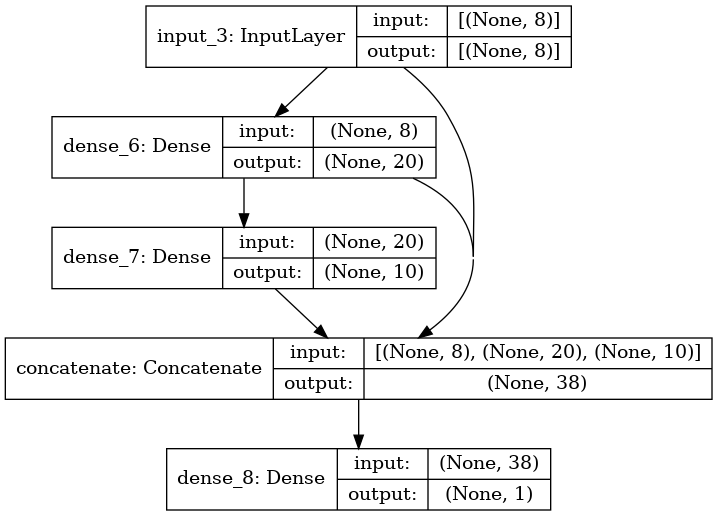

In [44]:
plot_model(model2_1, "Model MLP 2 Klasifikasi Biner.png", show_shapes=True)

In [45]:
history2_1=model2_1.fit(X_trainf,Y_trainf,epochs=100,validation_data=(X_testf,Y_testf))

Epoch 1/100
88/88 [==============================] - 1s 7ms/step - loss: 0.6930 - accuracy: 0.6277 - precision_1: 0.4620 - recall_1: 0.5271 - val_loss: 0.6096 - val_accuracy: 0.6750 - val_precision_1: 0.5527 - val_recall_1: 0.4090
Epoch 2/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.7009 - precision_1: 0.5914 - recall_1: 0.3769 - val_loss: 0.5750 - val_accuracy: 0.6783 - val_precision_1: 0.5546 - val_recall_1: 0.4444
Epoch 3/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7133 - precision_1: 0.5918 - recall_1: 0.4654 - val_loss: 0.5624 - val_accuracy: 0.6917 - val_precision_1: 0.5718 - val_recall_1: 0.4988
Epoch 4/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.7195 - precision_1: 0.5989 - recall_1: 0.5346 - val_loss: 0.5589 - val_accuracy: 0.6900 - val_precision_1: 0.5623 - val_recall_1: 0.5437
Epoch 5/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5

<Figure size 432x288 with 0 Axes>

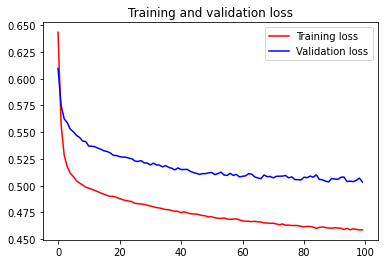

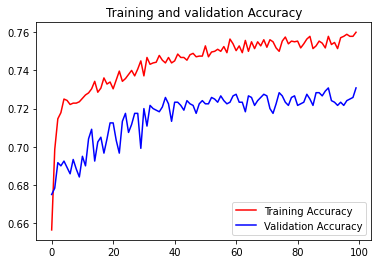

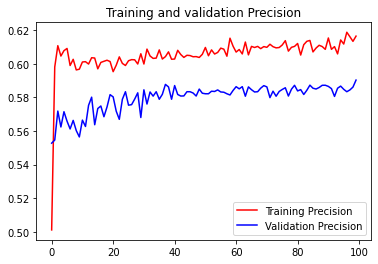

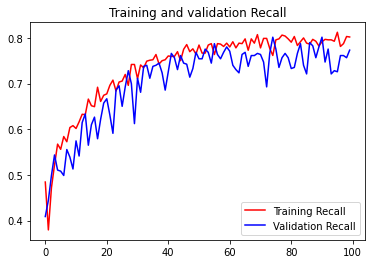

<Figure size 432x288 with 0 Axes>

In [46]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

loss=history2_1.history['loss']
val_loss=history2_1.history['val_loss']
acc=history2_1.history['accuracy']
val_acc=history2_1.history['val_accuracy']
prec=history2_1.history['precision_1']
val_prec=history2_1.history['val_precision_1']
rec=history2_1.history['recall_1']
val_rec=history2_1.history['val_recall_1']

epochs=range(len(acc))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label ='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, prec, 'r', label = 'Training Precision')
plt.plot(epochs, val_prec, 'b', label ='Validation Precision')
plt.title('Training and validation Precision')
plt.legend()
plt.figure()

plt.plot(epochs, rec, 'r', label = 'Training Recall')
plt.plot(epochs, val_rec, 'b', label ='Validation Recall')
plt.title('Training and validation Recall')
plt.legend()
plt.figure()

In [47]:
test2_1_eval=model2_1.evaluate(X_testf, Y_testf)
for name, value in zip(model2_1.metrics_names, test2_1_eval):
  print(name, ': ', value)
print()

38/38 [==============================] - 0s 1ms/step - loss: 0.5034 - accuracy: 0.7308 - precision_1: 0.5903 - recall_1: 0.7730
loss :  0.5034288763999939
accuracy :  0.7308333516120911
precision_1 :  0.590252697467804
recall_1 :  0.7730496525764465



In [48]:
Y_predf=model2_1.predict(X_testf)

In [49]:
Y_predf

array([[0.58903646],
       [0.6245886 ],
       [0.09477866],
       ...,
       [0.58040947],
       [0.04487476],
       [0.05769083]], dtype=float32)

In [50]:
y_predf=np.zeros(Y_predf.shape)
y_predf[Y_predf>0.5]=1
y_predf=np.array(y_predf)
y_predf

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]])

In [51]:
print(classification_report(Y_testf,y_predf))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77       777
           1       0.59      0.77      0.67       423

    accuracy                           0.73      1200
   macro avg       0.72      0.74      0.72      1200
weighted avg       0.76      0.73      0.74      1200



In [52]:
prediksi=pd.DataFrame(y_predf)
prediksi.rename(columns={0:'y'}, inplace=True)
prediksi=prediksi.astype(int)
prediksi.to_csv('Hasil Prediksi MLP 2 Klasifikasi Biner.csv',index=False)

In [53]:
#Simpan model
model2_1.save("MLP 2 Klasifikasi Biner.h5")

In [54]:
#Memuat (load) model 
model2_1=load_model("MLP 2 Klasifikasi Biner.h5")
Y_predf=model2.predict(X_testf)

## Klasifikasi *Multiclass*

In [55]:
#Model MLP Klasifikasi Multiclass
inputs=Input(shape=X_trainc.shape[1:])
layers=Dense(50,activation='relu')(inputs)
layers=Dense(25,activation='relu')(layers)
output=Dense(4,activation='softmax')(layers)
model3=Model(inputs=[inputs],outputs=[output])

model3.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=1e-3), 
              metrics=["accuracy"])

In [56]:
model3.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                900       
_________________________________________________________________
dense_10 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 104       
Total params: 2,279
Trainable params: 2,279
Non-trainable params: 0
_________________________________________________________________


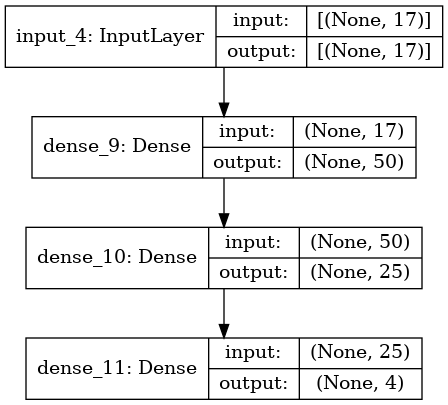

In [57]:
plot_model(model3, "Model MLP Klasifikasi Multiclass.png", show_shapes=True)

In [58]:
history3=model3.fit(X_trainc,Y_trainc,epochs=100,validation_data=(X_testc,Y_testc))

Epoch 1/100
253/253 [==============================] - 1s 2ms/step - loss: 1.2578 - accuracy: 0.4289 - val_loss: 1.5393 - val_accuracy: 0.3281
Epoch 2/100
253/253 [==============================] - 0s 2ms/step - loss: 1.1060 - accuracy: 0.5134 - val_loss: 1.5592 - val_accuracy: 0.3285
Epoch 3/100
253/253 [==============================] - 0s 2ms/step - loss: 1.0800 - accuracy: 0.5272 - val_loss: 1.5453 - val_accuracy: 0.3441
Epoch 4/100
253/253 [==============================] - 0s 2ms/step - loss: 1.0706 - accuracy: 0.5351 - val_loss: 1.5923 - val_accuracy: 0.3342
Epoch 5/100
253/253 [==============================] - 0s 2ms/step - loss: 1.0696 - accuracy: 0.5394 - val_loss: 1.5788 - val_accuracy: 0.3338
Epoch 6/100
253/253 [==============================] - 0s 2ms/step - loss: 1.0545 - accuracy: 0.5384 - val_loss: 1.5858 - val_accuracy: 0.3232
Epoch 7/100
253/253 [==============================] - 0s 2ms/step - loss: 1.0553 - accuracy: 0.5441 - val_loss: 1.5832 - val_accuracy: 0.3331

<Figure size 432x288 with 0 Axes>

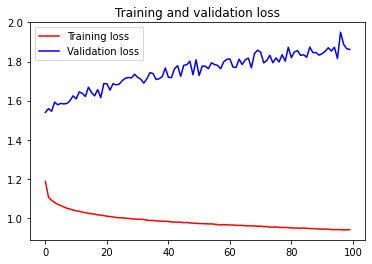

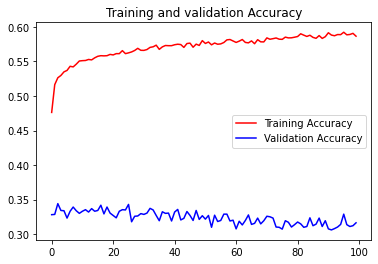

<Figure size 432x288 with 0 Axes>

In [59]:
loss=history3.history['loss']
val_loss=history3.history['val_loss']
acc=history3.history['accuracy']
val_acc=history3.history['val_accuracy']

epochs=range(len(acc))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label ='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()
plt.figure()

In [60]:
test3_eval=model3.evaluate(X_testc, Y_testc)
for name, value in zip(model3.metrics_names, test3_eval):
  print(name, ': ', value)
print()

83/83 [==============================] - 0s 964us/step - loss: 1.8622 - accuracy: 0.3163
loss :  1.8621686697006226
accuracy :  0.3163304030895233



In [61]:
Y_predc=model3.predict(X_testc)

In [62]:
Y_predc

array([[0.52577543, 0.24262348, 0.09823419, 0.13336688],
       [0.13681896, 0.45766845, 0.224885  , 0.18062754],
       [0.16186722, 0.3542902 , 0.45936513, 0.02447754],
       ...,
       [0.7286912 , 0.03846022, 0.01867679, 0.21417174],
       [0.2616363 , 0.5299895 , 0.1988687 , 0.00950551],
       [0.21459554, 0.02727622, 0.08170644, 0.67642176]], dtype=float32)

In [63]:
y_predc=Y_predc.argmax(axis=1)

In [64]:
print(classification_report(Y_testc,y_predc))

              precision    recall  f1-score   support

           0       0.35      0.26      0.30       846
           1       0.23      0.25      0.24       550
           2       0.24      0.30      0.27       472
           3       0.41      0.44      0.43       759

    accuracy                           0.32      2627
   macro avg       0.31      0.31      0.31      2627
weighted avg       0.32      0.32      0.32      2627



In [65]:
#Simpan model
model3.save("MLP Klasifikasi Multiclass.h5")

In [66]:
#Memuat (load) model 
model3=load_model("MLP Klasifikasi Multiclass.h5")
Y_predc=model3.predict(X_testc)